In [32]:
#Import packge

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

from mlxtend.frequent_patterns import apriori, association_rules

In [33]:
#Import Data

df = pd.read_csv(r"C:\Users\mohammad alsarese\OneDrive - Tafila Technical University\bread basket.csv")
df.head()

,Transaction,Item,date_time,period_day,weekday_weekend
0,1,Bread,30-10-2016 09:58,morning,weekend
1,2,Scandinavian,30-10-2016 10:05,morning,weekend
2,2,Scandinavian,30-10-2016 10:05,morning,weekend
3,3,Hot chocolate,30-10-2016 10:07,morning,weekend
4,3,Jam,30-10-2016 10:07,morning,weekend


In [3]:
#Missing Data

df.Item 

0                Bread
1         Scandinavian
2         Scandinavian
3        Hot chocolate
4                  Jam
             ...      
20502           Coffee
20503              Tea
20504           Coffee
20505           Pastry
20506        Smoothies
Name: Item, Length: 20507, dtype: object

In [4]:
#Checking the kind of data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20507 entries, 0 to 20506
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Transaction      20507 non-null  int64 
 1   Item             20507 non-null  object
 2   date_time        20507 non-null  object
 3   period_day       20507 non-null  object
 4   weekday_weekend  20507 non-null  object
dtypes: int64(1), object(4)
memory usage: 801.2+ KB


In [5]:
#Checking any mising value
df.isnull().sum()

Transaction        0
Item               0
date_time          0
period_day         0
weekday_weekend    0
dtype: int64

 Exploratory Analysis

In [34]:
#Transforming the table

def encoder(x):
    if x <= 0:
        return 0
    elif x>= 1:
        return 1


df_v2 = df.groupby(['Transaction', 'Item'])['Item'].count().reset_index(name='Qtde')
df_bask = df_v2.pivot_table(index='Transaction', columns='Item', values='Qtde', aggfunc='sum').fillna(0)
df_bask_final = df_bask.applymap(encoder)

df_bask_final.head(50)


C:\Users\mohammad alsarese\AppData\Local\Temp\ipykernel_9300\354883132.py:12: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_bask_final = df_bask.applymap(encoder)


Item,Adjustment,Afternoon with the baker,Alfajores,Argentina Night,Art Tray,Bacon,Baguette,Bakewell,Bare Popcorn,Basket,...,The BART,The Nomad,Tiffin,Toast,Truffles,Tshirt,Valentine's card,Vegan Feast,Vegan mincepie,Victorian Sponge
Transaction,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
df_bask_final.to_csv("data_binary.csv", index=False)

Applying the Model

Processing 174 combinations | Sampling itemset size 3


C:\Users\mohammad alsarese\anaconda3\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(
C:\Users\mohammad alsarese\AppData\Local\Temp\ipykernel_9300\4129304552.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax5 = sns.barplot(data=df_supp_without[:10], x='support', y='itemsets', palette='rocket',color='black')


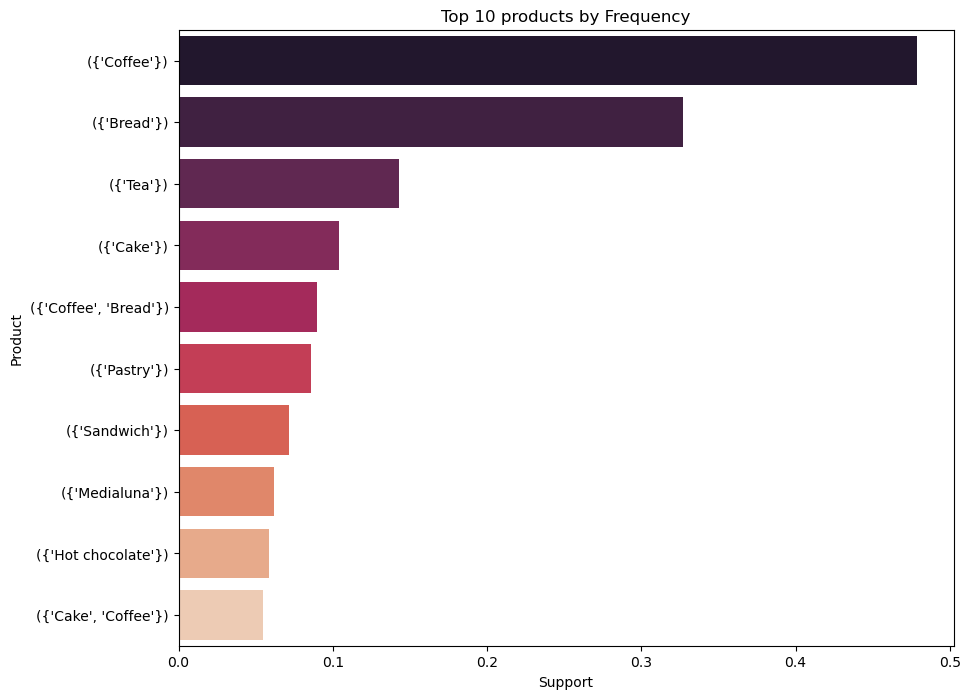

,support,itemsets
4,0.478394,(Coffee)
1,0.327205,(Bread)
16,0.142631,(Tea)
3,0.103856,(Cake)
20,0.090016,"(Coffee, Bread)"


In [35]:
df_apr = apriori(df_bask_final, min_support=0.02, use_colnames=True,verbose=1).sort_values(by='support', ascending=False)

# Top 10 products by frequency of purchase

fig, ax5 = plt.subplots(figsize=(10,8))
ax5 = sns.barplot(data=df_supp_without[:10], x='support', y='itemsets', palette='rocket',color='black')
ax5.set_title("Top 10 products by Frequency")
ax5.set_xlabel("Support")
ax5.set_ylabel("Product")

plt.show()
df_apr.head()

In [12]:
df_apr.to_csv("supp.csv",index=False)

In [58]:
#Applying the association rule

df_assR = association_rules(df_apr, metric='confidence', min_threshold=0.01 , num_itemsets=0).sort_values(by='confidence', ascending=False)
df_assR.sort_values('confidence', ascending = False, inplace = True)
df_assR.reset_index(drop=True, inplace = True)
df_assR.head(30)



,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(Toast),(Coffee),0.033597,0.478394,0.023666,0.704403,1.472431,1.0,0.007593,1.764582,0.332006,0.048464,0.433293,0.376936
1,(Medialuna),(Coffee),0.061807,0.478394,0.035182,0.569231,1.189878,1.0,0.005614,1.210871,0.170091,0.069665,0.174148,0.321387
2,(Pastry),(Coffee),0.086107,0.478394,0.047544,0.552147,1.154168,1.0,0.006351,1.164682,0.146161,0.091968,0.141396,0.325764
3,(Juice),(Coffee),0.038563,0.478394,0.020602,0.534247,1.116750,1.0,0.002154,1.119919,0.108738,0.041507,0.107078,0.288656
4,(Sandwich),(Coffee),0.071844,0.478394,0.038246,0.532353,1.112792,1.0,0.003877,1.115384,0.109205,0.074701,0.103448,0.306150
5,(Cake),(Coffee),0.103856,0.478394,0.054728,0.526958,1.101515,1.0,0.005044,1.102664,0.102840,0.103745,0.093105,0.320679
6,(Cookies),(Coffee),0.054411,0.478394,0.028209,0.518447,1.083723,1.0,0.002179,1.083174,0.081700,0.055905,0.076787,0.288707
7,(Hot chocolate),(Coffee),0.058320,0.478394,0.029583,0.507246,1.060311,1.0,0.001683,1.058553,0.060403,0.058333,0.055314,0.284542
8,(Tea),(Coffee),0.142631,0.478394,0.049868,0.349630,0.730840,1.0,-0.018366,0.802014,-0.300482,0.087310,-0.246862,0.226935
9,(Pastry),(Bread),0.086107,0.327205,0.029160,0.338650,1.034977,1.0,0.000985,1.017305,0.036980,0.075908,0.017011,0.213884


In [23]:
df_assR=df_assR.drop(['antecedent support','consequent support','representativity','leverage','conviction','zhangs_metric','jaccard','certainty','kulczynski'],axis=1)

In [24]:
df_assR.to_csv('rulift.csv',index=False)

In [46]:
print(df_assR.dtypes) 

antecedents            object
consequents            object
antecedent support    float64
consequent support    float64
support               float64
confidence            float64
lift                  float64
representativity      float64
leverage              float64
conviction            float64
zhangs_metric         float64
jaccard               float64
certainty             float64
kulczynski            float64
dtype: object


In [32]:
df_assR.to_csv("rules.csv",index=False)

#### ** Network Visualization 
**

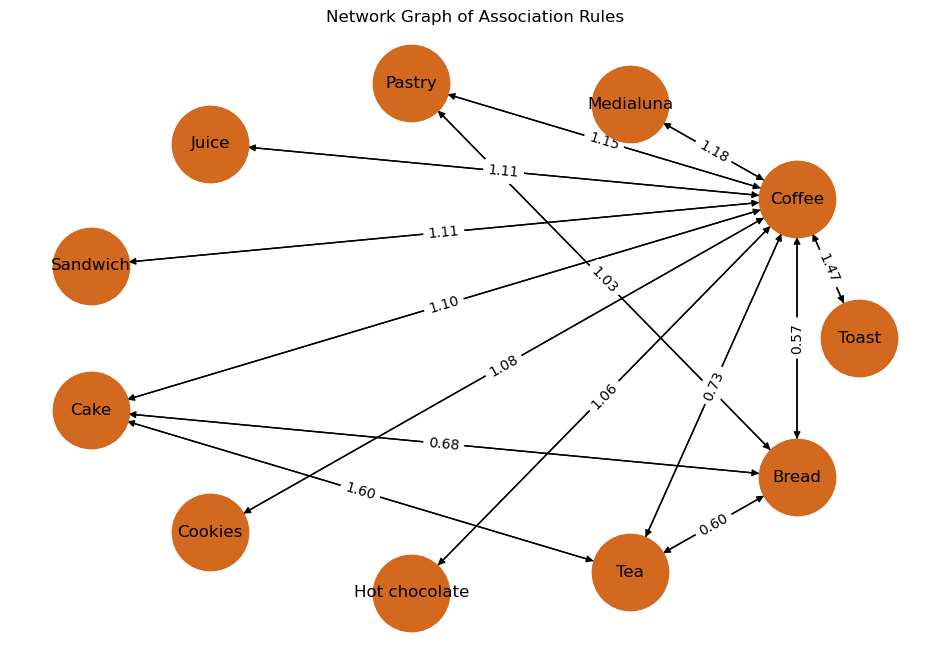

In [59]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt



# Create a directed graph
Basket_Network2 = nx.DiGraph()

# Prepare the data for the network
Basket_Network_Data_zip = zip(df_assR["antecedents"],
                              df_assR["consequents"],
                              df_assR["antecedent support"],
                              df_assR["consequent support"],
                              df_assR["support"])

for i in Basket_Network_Data_zip:
    FromItem = str(i[0]).replace("frozenset({'", "").replace("'})", "").replace("',　'", ",")
    ToItem = str(i[1]).replace("frozenset({'", "").replace("'})", "").replace("',　'", ",")
    FromWeight = i[2]
    ToWeight = i[3]
    EdgeWeight = i[4]
    Lift = (EdgeWeight / (FromWeight * ToWeight))

    Basket_Network2.add_node(FromItem)
    Basket_Network2.add_node(ToItem)
    Basket_Network2.add_edge(FromItem, ToItem, weight=Lift, label=str(Lift)[:4])

# Set positions for the nodes in a circular layout
Basket_Network2_Pos = nx.circular_layout(Basket_Network2)

# Create labels for the nodes
Basket_Network2_Label = {}
for k in Basket_Network2_Pos.keys():
    Basket_Network2_Label[k] = k

# Draw the network with customizations
plt.figure(figsize=(12, 8),facecolor='black')


nx.draw_networkx_labels(Basket_Network2, pos=Basket_Network2_Pos, labels=Basket_Network2_Label, font_size=12)
nx.draw_circular(Basket_Network2, node_size=3000, node_color='chocolate', font_size=10, font_weight="bold", arrows=True)
nx.draw_networkx_nodes(Basket_Network2, pos=Basket_Network2_Pos, node_size=3000, node_color='chocolate')
nx.draw_networkx_edge_labels(Basket_Network2, pos=Basket_Network2_Pos, edge_labels=nx.get_edge_attributes(Basket_Network2, 'label'))

plt.title('Network Graph of Association Rules')
plt.show()

#### **heatmap for support and confidence and lift**

## **support**

In [50]:
df_withut_froznset=pd.read_csv(r"C:\Users\mohammad alsarese\Downloads\rules (1).csv")

In [51]:
df_withut_froznset.head()

,antecedents,consequents,support,confidence,lift
0,({'Toast'}),({'Coffee'}),0.023666,0.704403,1.472431
1,({'Medialuna'}),({'Coffee'}),0.035182,0.569231,1.189878
2,({'Pastry'}),({'Coffee'}),0.047544,0.552147,1.154168
3,({'Juice'}),({'Coffee'}),0.020602,0.534247,1.116750
4,({'Sandwich'}),({'Coffee'}),0.038246,0.532353,1.112792


C:\Users\mohammad alsarese\AppData\Local\Temp\ipykernel_9300\1842200940.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax5 = sns.barplot(data=df_withut_froznset[:30], x='support', y='combined', palette='rocket')


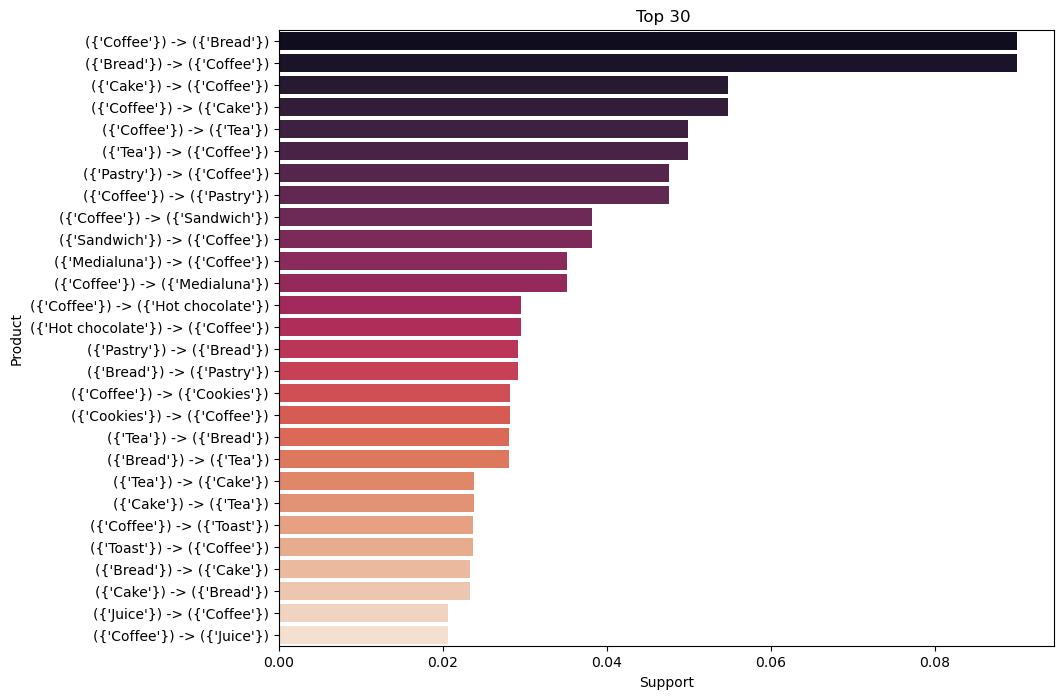

In [55]:
df_assR['antecedents'] = df_assR['antecedents'].apply(lambda x: str(x).replace('frozenset', ''))
df_assR['consequents'] = df_assR['consequents'].apply(lambda x: str(x).replace('frozenset', ''))
df_withut_froznset = df_assR.sort_values(by='support', ascending=False)
# دمج العمودين باستخدام دالة apply
def combine_columns(row):
    return f"{row['antecedents']} -> {row['consequents']}"

df_withut_froznset['combined'] = df_withut_froznset.apply(combine_columns, axis=1)


fig, ax5 = plt.subplots(figsize=(10,8))
ax5 = sns.barplot(data=df_withut_froznset[:30], x='support', y='combined', palette='rocket')
ax5.set_title("Top 30 ")
ax5.set_xlabel("Support")
ax5.set_ylabel("Product")
#ax5 = sns.barplot(data=df[:30], x='lift', y='combined', palette='rocket')
plt.show()

#### **confidence**

C:\Users\mohammad alsarese\AppData\Local\Temp\ipykernel_9300\2624182746.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax5 = sns.barplot(data = df_withut_froznset[:30], x='confidence', y='combined', palette='rocket')


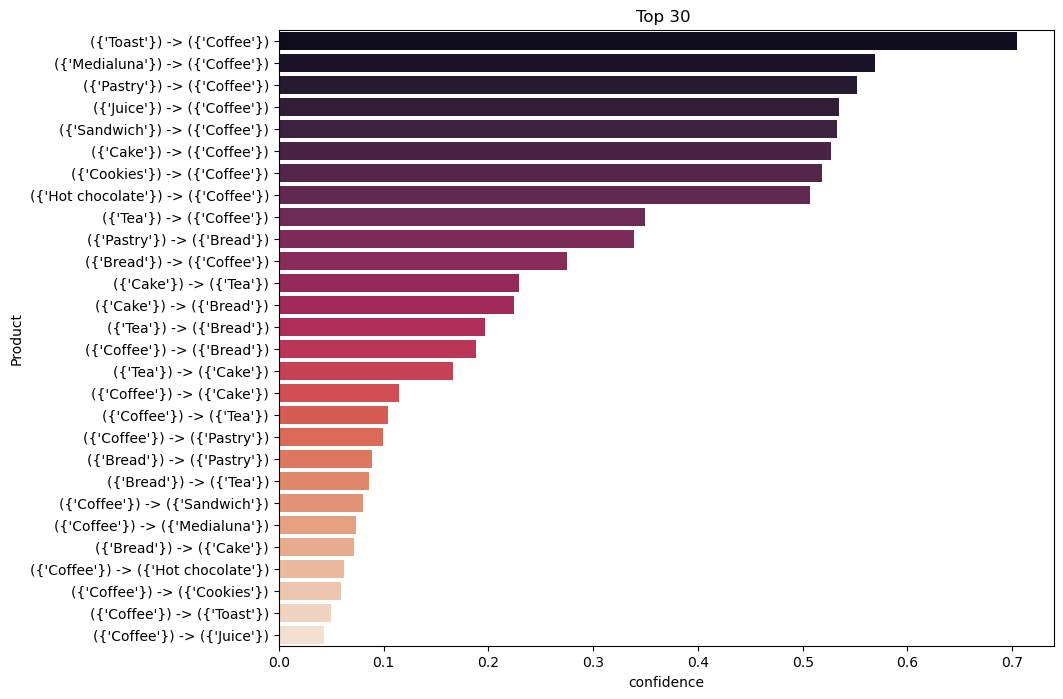

In [60]:
df_withut_froznset = df_withut_froznset.sort_values(by='confidence', ascending=False)
fig, ax5 = plt.subplots(figsize=(10,8))
ax5 = sns.barplot(data = df_withut_froznset[:30], x='confidence', y='combined', palette='rocket')
ax5.set_title("Top 30 ")
ax5.set_xlabel("confidence")
ax5.set_ylabel("Product")
plt.show()